In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
# plt.style.use('default')
color_pallete = ['#fc5185', '#3fc1c9', '#364f6b']
sns.set_palette(color_pallete)
sns.set_style("white")

haha


# Initial Exploration of the data 

In [3]:
df = pd.read_csv('data/Train_set.csv')
df.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [4]:
df.shape

(8068, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 472.8+ KB


In [6]:
# Explore the unique values of each variable 
# identify binary variables 
unique = [df[i].unique() for i in df.columns]
pd.DataFrame({
    'columns' : df.columns ,
    'unique_values' : unique,
    'num_of_unique_values': [len(i) for i in unique]
})

columns                                      unique_values  \
0                ID  [462809, 462643, 466315, 461735, 462669, 46131...   
1            Gender                                     [Male, Female]   
2      Ever_Married                                     [No, Yes, nan]   
3               Age  [22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 7...   
4         Graduated                                     [No, Yes, nan]   
5        Profession  [Healthcare, Engineer, Lawyer, Entertainment, ...   
6   Work_Experience  [1.0, nan, 0.0, 4.0, 9.0, 12.0, 3.0, 13.0, 5.0...   
7    Spending_Score                               [Low, Average, High]   
8       Family_Size  [4.0, 3.0, 1.0, 2.0, 6.0, nan, 5.0, 8.0, 7.0, ...   
9             Var_1  [Cat_4, Cat_6, Cat_7, Cat_3, Cat_1, Cat_2, nan...   
10     Segmentation                                       [D, A, B, C]   

    num_of_unique_values  
0                   8068  
1                      2  
2                      3  
3                     67  
4                      3  
5                     10  
6                     16  
7                      3  
8                     10  
9                      8  
10                     4

In [7]:
# Explore the missingness of values 
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Interpretations : 
     
   
   the data contains over 8000 observations and 11 different variables with types { Object , floats and int } , among the Object variables there is three binary ones { Gender , Ever Married , Graduated } the last two of them contains missing values , one of the int variables is the ID variable which is useless for our modeling purpose since num_of_unique_values == num_of_observations , excluding the Id variable we will have 10 variables 6 of them contains missing values 


In [8]:
# Excluding the ID variable 
if 'ID' in df.columns :
    df.drop('ID' , axis = 1 , inplace = True)

In [9]:
# Extraction list of numerical and categorical values 

numerical = []
categorical = []

for i in df.columns : 
    if df[i].dtype == np.object and i != 'Segmentation' :
        categorical.append(i)
    elif i != 'Segmentation' : 
        numerical.append(i)

# Exploratory data analysis

## Univariate  and bivariate analysis 

### Explore the target variable 

In [10]:
sns.countplot(df.Segmentation)

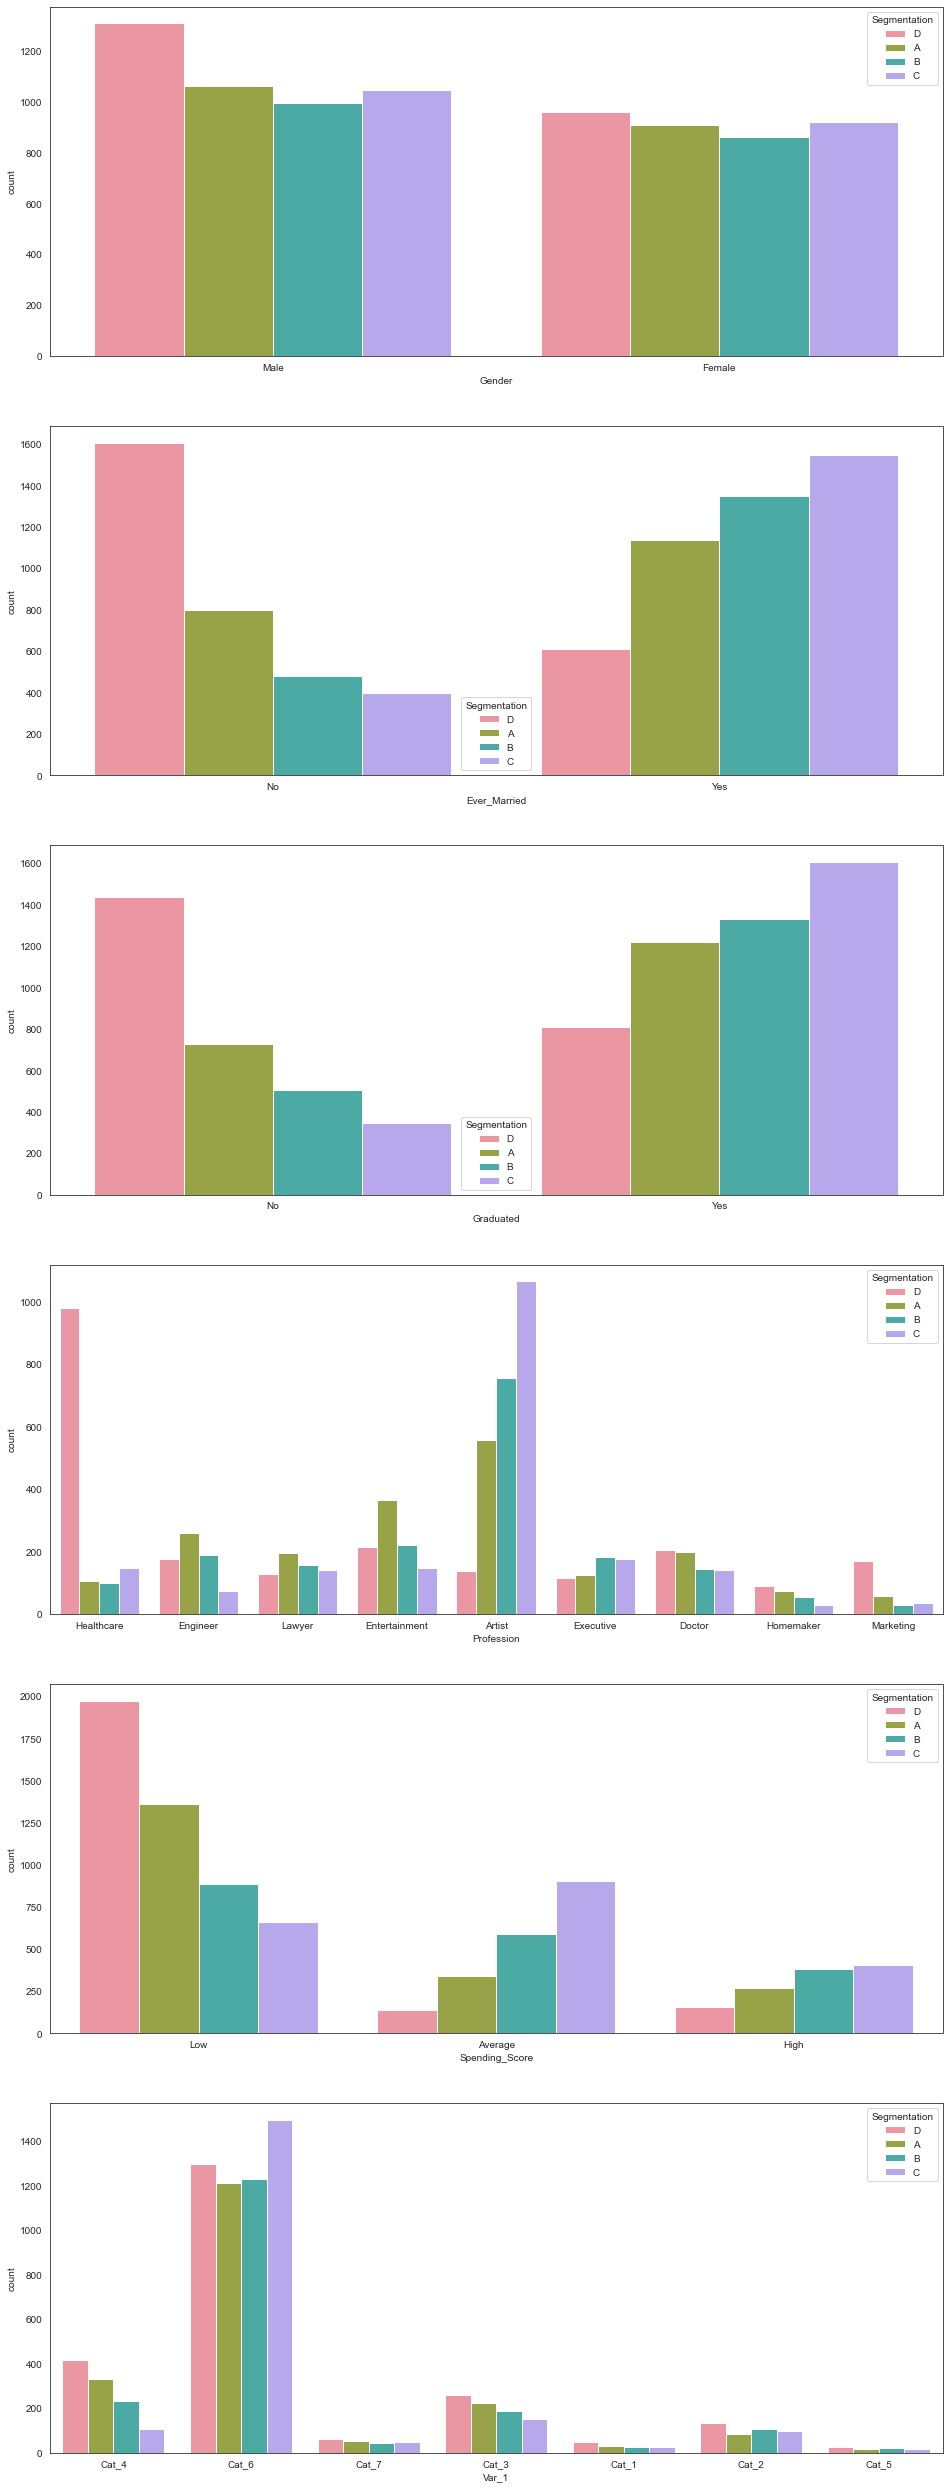

In [11]:
#target vs other categorical variables 

fig , ax = plt.subplots(len(categorical) , 1 , figsize = (16 ,45))
for i in range(len(categorical)) : 
    sns.countplot(df[categorical[i]] , hue = df.Segmentation , ax = ax[i])

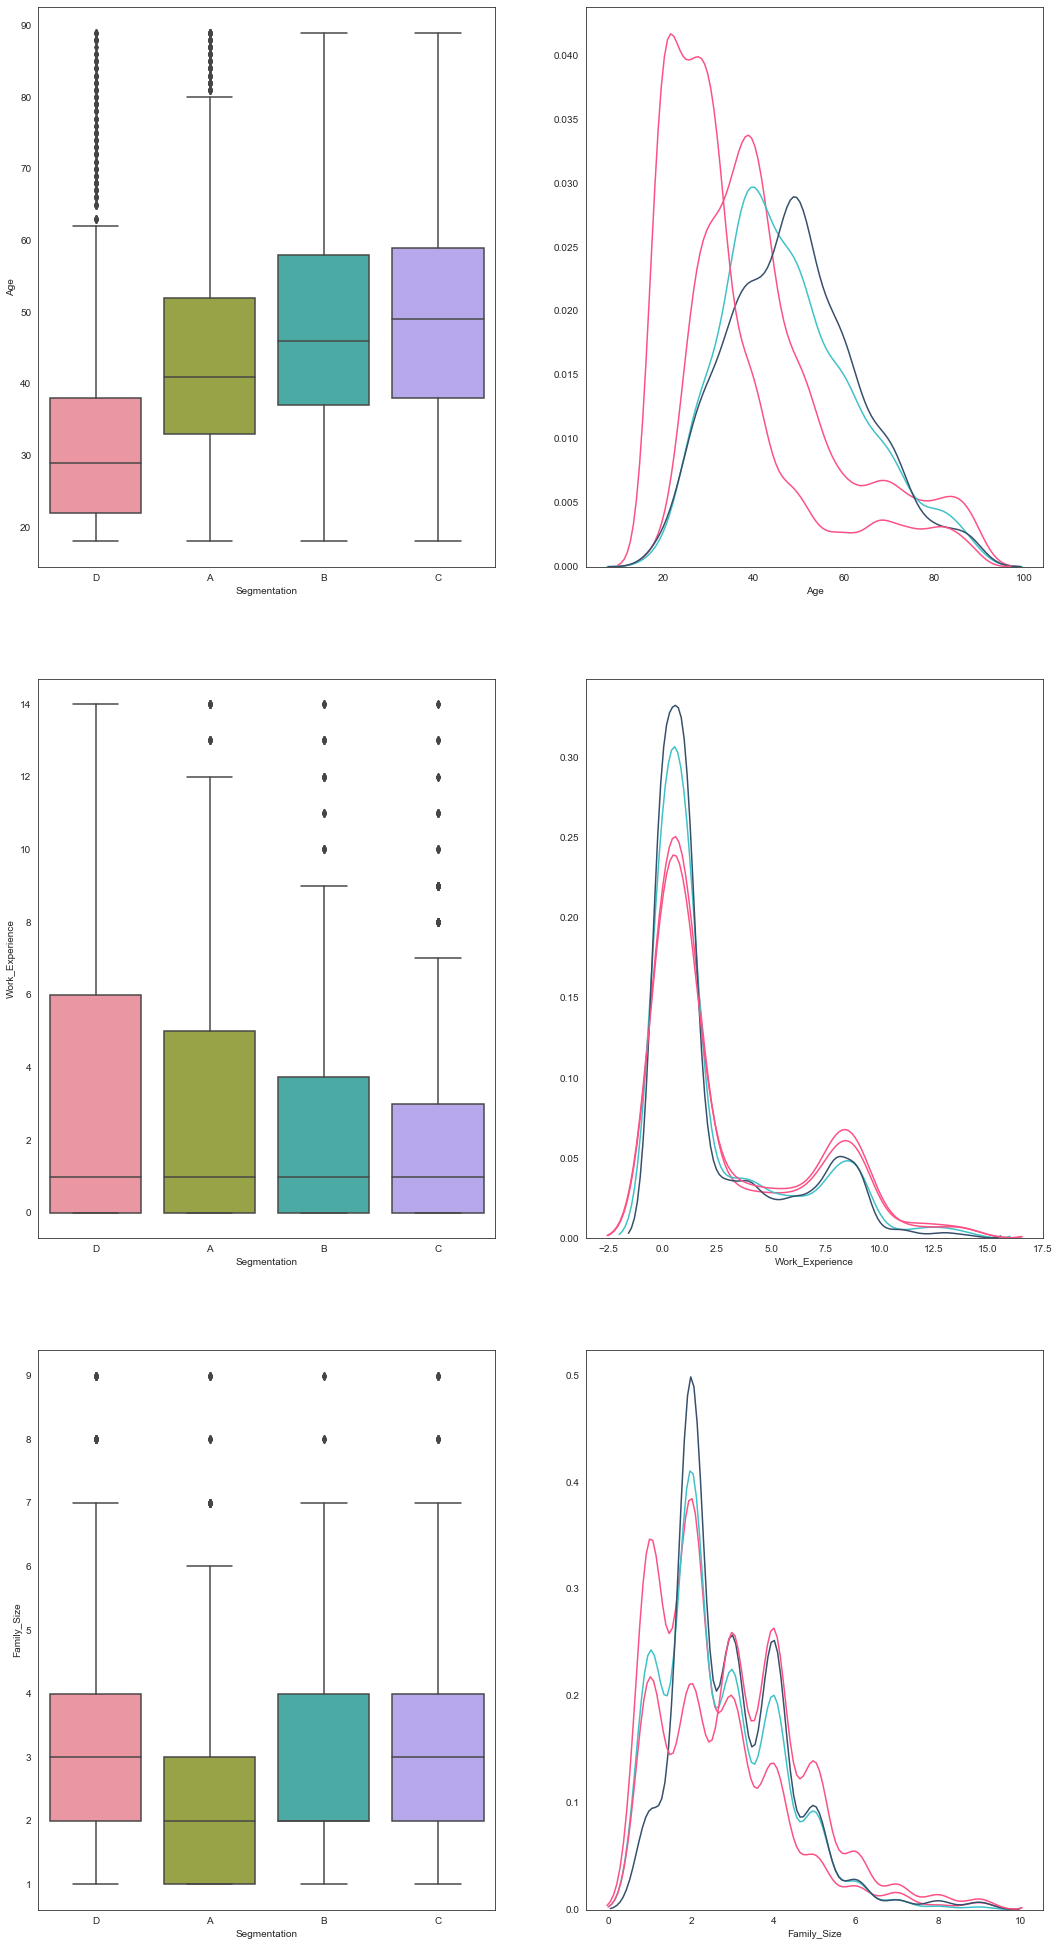

In [12]:
# target variable vs numerical variables 
fig , ax = plt.subplots(len(numerical) , 2 , figsize = (18 ,35))
for i in range(len(numerical)):
    sns.boxplot(y = df[numerical[i]] , x = df.Segmentation , ax = ax[i,0])
    sns.distplot(df[numerical[i]][df.Segmentation == 'A'] ,hist=False ,   ax=ax[i,1])
    sns.distplot(df[numerical[i]][df.Segmentation == 'B'] ,hist=False ,  ax=ax[i,1])
    sns.distplot(df[numerical[i]][df.Segmentation == 'C'] ,hist=False ,  ax=ax[i,1])
    sns.distplot(df[numerical[i]][df.Segmentation == 'D'] ,hist=False ,  ax=ax[i,1])


Interpretation : 

- there is an equal number of samples drawn from each segment which mean absence of imbalanced data 
- every categorical variable seems to distinct between each segement for example :
    - for genders : males are more likely to be in segment D than females 
    - for marriage status : married people are less likely to be in segment D than non married people 
        and married people have higher chance to be in segment C than non married people
- for numerical variable iy seems that age is the only variable that differentiate between the segments well as we can see that the distribution of each segment according to the age are slightly seperated , in contrast the other variables have their distributions overlaped meaning less variability among the distribution of each segment  

## multivariate analysis  

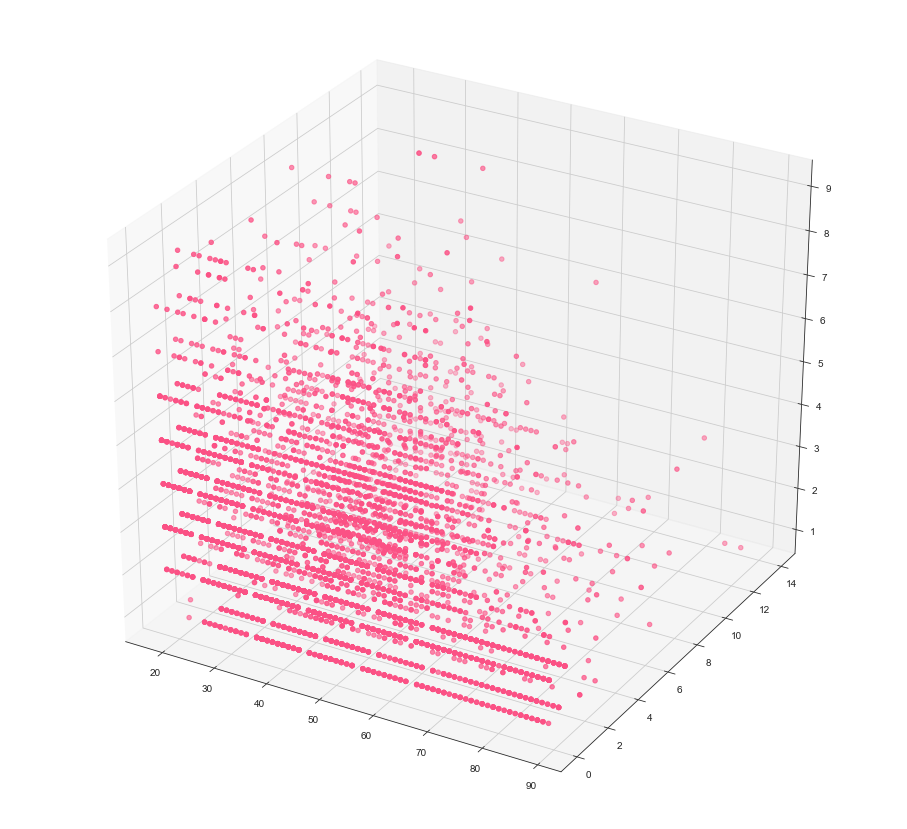

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (16 , 15))
# ax = fig.add_subplot(111 , projection = '3D')
ax = fig.add_subplot(111, projection='3d')

xs = df['Age'].values
ys = df.Work_Experience.values
zs = df.Family_Size.values
ax.scatter(xs , ys , zs )


In [14]:
import plotly_express as px
px.scatter_3d(df, x="Age", y="Family_Size", z="Work_Experience", 
              color="Segmentation")

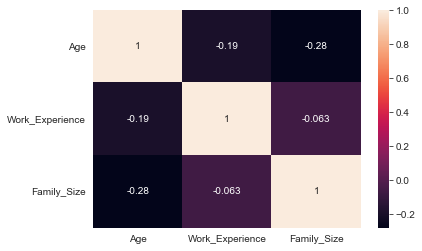

In [15]:
sns.heatmap(df[numerical].corr() , annot= True)

<Figure size 1296x1296 with 0 Axes>

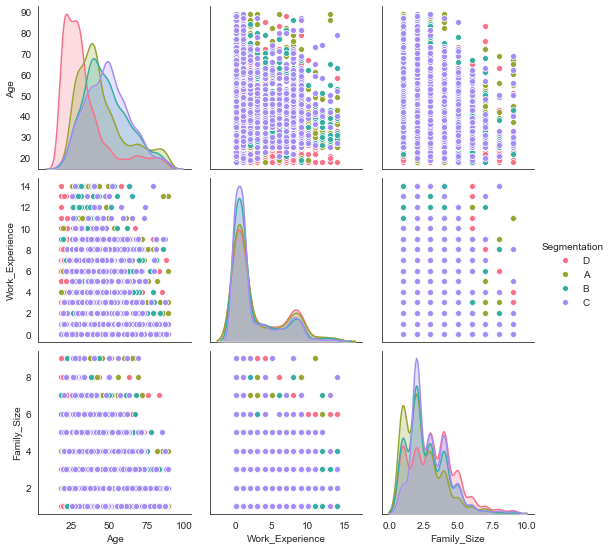

In [16]:
plt.figure(figsize=(18, 18))
sns.pairplot(df , hue= 'Segmentation')
plt.show()

It seems there is no correlation between the numerical variables , also there is no variety of segments in scatter plots between family size and work experience 

# Handling missing Values 

## Exploring missing values 

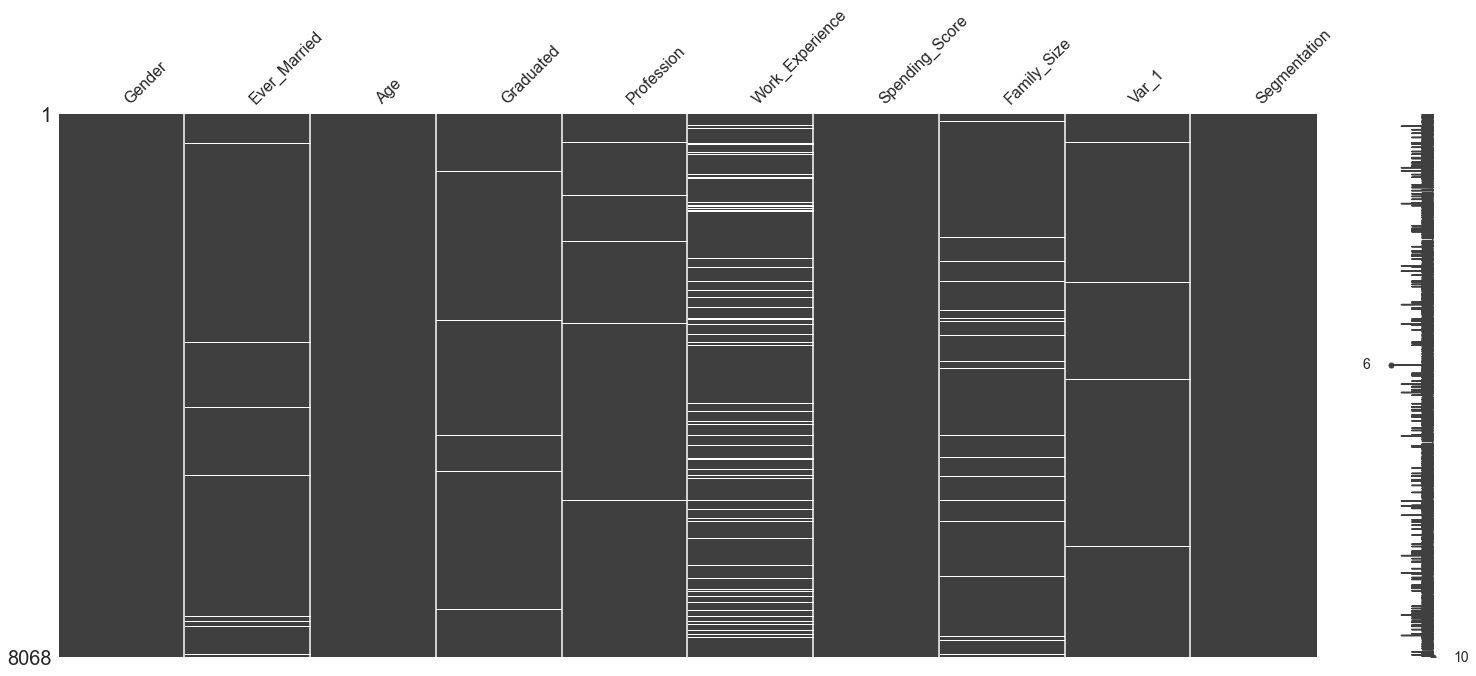

In [16]:
import missingno as mno
mno.matrix(df)

In [17]:
def summary_missing_data (data):
    col = data.columns

    valmiss = [data[i].isnull().sum() for i in col]

    numcases = [len(data) - valmiss[i] for i in range(len(valmiss))]

    mean_of_col = []
    for i in col : 
        if data[i].dtype != 'O':
            mean_of_col.append(round(np.nanmean(data[i]) , ndigits=1))
        else : 
            mean_of_col.append(np.nan)
    
    std_of_col = []
    for i in col : 
        if data[i].dtype != 'O':
            std_of_col.append(round(data[i].std() , ndigits=2))
        else : 
            std_of_col.append(np.nan)
        
    percent_of_missing = [f'{int(round((valmiss[i]/len(data))*100, ndigits=0))}%' for i in range(len(valmiss))]

    summary_missing_table = pd.DataFrame({
        'Variables':col,
        'number of cases':numcases,
        'Mean':mean_of_col,
        'Standard deviation':std_of_col,
        'Number of missing values' : valmiss,
        'Percent' : percent_of_missing 
    })

#     summary_missing_table.iloc[9: , 2:4] = np.nan
    return summary_missing_table


In [18]:
summary_missing_data(df)

Variables  number of cases  Mean  Standard deviation  \
0           Gender             8068   NaN                 NaN   
1     Ever_Married             7928   NaN                 NaN   
2              Age             8068  43.5               16.71   
3        Graduated             7990   NaN                 NaN   
4       Profession             7944   NaN                 NaN   
5  Work_Experience             7239   2.6                3.41   
6   Spending_Score             8068   NaN                 NaN   
7      Family_Size             7733   2.9                1.53   
8            Var_1             7992   NaN                 NaN   
9     Segmentation             8068   NaN                 NaN   

   Number of missing values Percent  
0                         0      0%  
1                       140      2%  
2                         0      0%  
3                        78      1%  
4                       124      2%  
5                       829     10%  
6                         0      0%  
7                       335      4%  
8                        76      1%  
9                         0      0%

In [19]:
def summary_two(data):
    missing_data_per_case = [data.iloc[i,].isnull().sum() for i in range(len(data))]

    summary_table_two = pd.DataFrame({'Number of missing per case':pd.Series(missing_data_per_case).value_counts().index,
                 'number of cases':pd.Series(missing_data_per_case).value_counts()
                 }).reset_index()

    del summary_table_two['index']

    summary_table_two['percent'] = round((summary_table_two['number of cases']/len(data))*100,ndigits=0)
    return summary_table_two

In [20]:
summary_two(df)

Number of missing per case  number of cases  percent
0                           0             6665     83.0
1                           1             1244     15.0
2                           2              140      2.0
3                           3               18      0.0
4                           4                1      0.0

it seems that the Work_Experience data has more than 10% of missing values which gives us more reasons to drop the variable beside the fact that it cant distinguish between segments , to verify the last hypothesis we will conduct kruskal-wallis non parametric test  

In [21]:
from scipy import stats

def arange_data(data , cat):
    X = data.copy()
    df = X[[cat , 'Work_Experience']]
#     df.dropna(inplace=True)
    groupednumbers = {}
    for grp in df[cat].unique(): 
        groupednumbers[grp] = df['Work_Experience'][df[cat]==grp].values
    args = [groupednumbers[grp] for grp in sorted(df[cat].unique())] 
    return args 


args  = arange_data(df , 'Segmentation')
H , pval = stats.mstats.kruskalwallis(*args)
print("H-statistic:\t%s\nP-value:\t%s" % (str(H),str(pval)))
if pval < 0.1:
    print("\nWork_Experience vs target : Reject NULL hypothesis - Significant differences exist between groups.\n")
if pval > 0.1:
    print("\nWork_Experience vs target : Accept NULL hypothesis - No significant difference between groups.\n")

H-statistic:	42.22447623457544
P-value:	3.595309815472992e-09

Work_Experience vs target : Reject NULL hypothesis - Significant differences exist between groups.



it seems that there is a significant diffrence in the Work_Experience variable which makes it valuable for modeling but 10% is too much missing value to imput but we can try another modeling approch where we include the missing values and just mark them and see if its gonna boost the accuracy 

### Imputing missing values using Random forest similarity matrix 

#### 1-  Training a random forest algorithm

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder


#first we drop the Work_Experience variable 
X = df.copy()
X.drop('Work_Experience' , axis = 1 , inplace = True)

# fill NaN with random values (most frequent for nominal values  and median for numerical values ) 
for i in X.columns : 
    if X[i].isna().sum() and  X[i].dtype == 'O':
        X[i] = X[[i]].apply(lambda x:x.fillna(x.value_counts().index[0]))
    elif X[i].isna().sum(): 
        X[i] = X[[i]].fillna(X[i].median())


# one hot encoding the categorical variables 
for col in categorical:
    dummies = pd.get_dummies(X[col], drop_first=False)
    dummies = dummies.add_prefix('{}_'.format(col))
    X.drop(col, axis=1, inplace=True)
    X = X.join(dummies)

# Lebel encoding the target variable 
a = X.Segmentation
le = LabelEncoder()
le.fit(a)
X['Segmentation'] = le.fit_transform(a)

y = X['Segmentation']

x = X[[i for i in X.columns if i != 'Segmentation']]

# searching for best parameters with randomized search cross validation

RFclf = RandomForestClassifier()

# params = {
#     'max_depth': stats.randint(10 ,50),
#     'max_features': ['sqrt' , 'log2', 'auto'] ,
#     'n_estimators': stats.randint(10 ,500)
# }

# grid = RandomizedSearchCV(RFclf , params , cv = 5 , scoring = 'accuracy')
# grid.fit(x , y )

In [28]:
# grid.best_params_
best_params_ = {'max_depth': 11, 'max_features': 'log2', 'n_estimators': 406}
model = RFclf.set_params(**best_params_)
model.fit(x,y)

RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=406)

#### 2-  Construct the Similarity matrix or  proximity matrix

In [105]:
def proxmatrix(model , X , normalize = True):
    
    """
    Create the proximity matrix that can be done to fill missing values based on their similarity and also
    use the matrix for clustering problems 
    model.apply(X) : Returns
    X_leavesndarray of shape (n_samples, n_estimators)
    For each datapoint x in X and for each tree in the forest, return the index of the leaf x ends up in
"""
    terminals = model.apply(x)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)
    for i in range(1 , nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)
    if normalize :
        proxMat = proxMat / nTrees
    return proxMat

In [45]:
#Since i have weak laptop i had to produce the proxmatrix in a seperated .py file due to memory problems 
# and saved the array
proxMat = np.load('data/proximity_matrix.npy')

 #### 3-  Impute the missing value using the proximities

In [78]:
def imputing(X , col  , proximity_matrix):
    
    nr , nc = X.shape
    O_i = X[col][X[col].isna() == False]
    M_i = X[col][X[col].isna() == True ]
    n_oi = O_i.shape[0]
    n_mi = M_i.shape[0]
    if X[col].dtype == 'O':
        for i in M_i.index:
            
            # list of weighted frequency of each label 
            weighted_f = []
            # iterate through labels
            for j in X[col].unique() : 
                # get a sub Serie contain jth label 
                label = X[col][X[col] == j]
                n_label = label.shape[0]
                # calculate label frequency 
                f_label = n_label / n_oi
                # calculate proximity of a label 
                proximity =  np.sum(proximity_matrix[ i , label.index ]) / np.sum(proximity_matrix[ i , : ])
                # calculate the weighted frequency of a label 
                weighted_f.append(f_label * proximity)
            
            approx_val = X[col].unique()[weighted_f.index(max(weighted_f))]
            X[col][i] = approx_val
    else : 
        for i in M_i.index : 
            value = 0
            for j in O_i.index:
                # calculate the weighted average
                value +=  O_i[j] * ( proximity_matrix[ j , i ] / np.sum(proximity_matrix[ i , : ])  )
                
            X[col][i] = value
                
    return X
        

In [80]:
s = imputing(X , 'Graduated'  , proxMat)

In [83]:
s.isna().sum()

Gender              0
Ever_Married      140
Age                 0
Graduated           0
Profession        124
Spending_Score      0
Family_Size       335
Var_1              76
Segmentation        0
dtype: int64

#### 4-  Everything in a transformer class 

In [1]:
class Handle_MV : 

	def __init__(self , target ):
		self.target = target 

	def fit(self , X , y = None ):
		return self 

	@staticmethod 
	def data_prep(X , y ):
		numerical = []
		categorical = []

		for i in X.columns : 
		
			if X[i].dtype == np.object :
				categorical.append(i)
			else: 
				numerical.append(i)
		
		X.drop('Work_Experience' , axis = 1 , inplace = True)


		for i in X.columns : 
		
			if X[i].isna().sum() and  X[i].dtype == 'O':		
				X[i] = X[[i]].apply(lambda x:x.fillna(x.value_counts().index[0]))
			
			elif X[i].isna().sum(): 
				X[i] = X[[i]].fillna(X[i].median())



		for col in categorical:
			dummies = pd.get_dummies(X[col], drop_first=False)
		
			dummies = dummies.add_prefix('{}_'.format(col))
			
			X.drop(col, axis=1, inplace=True)
			
			X = X.join(dummies)

		
		a = y.copy()
		le = LabelEncoder()
		le.fit(a)
		y = le.fit_transform(a)


		return X , y 


	@staticmethod
	def imputing(X , col  , proximity_matrix):
	
		nr , nc = X.shape
		O_i = X[col][X[col].isna() == False]
		M_i = X[col][X[col].isna() == True ]
		n_oi = O_i.shape[0]
		n_mi = M_i.shape[0]
		if X[col].dtype == 'O':
			for i in M_i.index:
				
				# list of weighted frequency of each label 
				weighted_f = []
				# iterate through labels
				for j in X[col].unique() : 
					# get a sub Serie contain jth label 
					label = X[col][X[col] == j]
					n_label = label.shape[0]
					# calculate label frequency 
					f_label = n_label / n_oi
					# calculate proximity of a label 
					proximity =  np.sum(proximity_matrix[ i , label.index ]) / np.sum(proximity_matrix[ i , : ])
					# calculate the weighted frequency of a label 
					weighted_f.append(f_label * proximity)
				
				approx_val = X[col].unique()[weighted_f.index(max(weighted_f))]
				X[col][i] = approx_val
		else : 
			for i in M_i.index : 
				value = 0
				for j in O_i.index:
					# calculate the weighted average
					value +=  O_i[j] * ( proximity_matrix[ j , i ] / np.sum(proximity_matrix[ i , : ])  )
					
				X[col][i] = value
					
		return X[col]


	@staticmethod

	def proxmatrix(model , X , normalize = True):

		

		"""

		Create the proximity matrix that can be done to fill missing values based on their similarity and also

		use the matrix for clustering problems 

		model.apply(X) : Returns

		X_leavesndarray of shape (n_samples, n_estimators)

		For each datapoint x in X and for each tree in the forest, return the index of the leaf x ends up in
	"""

		terminals = model.apply(x)

		nTrees = terminals.shape[1]


		a = terminals[:,0]

		proxMat = 1*np.equal.outer(a, a)

		for i in range(1 , nTrees):
			a = terminals[:,i]
			proxMat += 1*np.equal.outer(a, a)

		
		if normalize :
			proxMat = proxMat / nTrees

		return proxMat


	def transform(self , X , y = None):
		X_ = X.copy()

		model = RandomForestClassifier()
		model = model.set_params(**best_params_)

		x_ , y_ = data_prep(X  , self.target)

		model.fit(x_ , y_ )

		proxMat = proxmatrix(model , x_)

		for col in X_.columns : 
			X_[col] = imputing(X_ , col , proxMat )


		return X_

Since this method is computational expensive and my cpu cant handle it i will be using only mean imputation for numerical data and most common value imputation for categorical

# Feature selection 

In [17]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.5):
    X = data.copy()
    selector = VarianceThreshold(threshold)
    selector.fit(X)
    return X[X.columns[selector.get_support(indices=True)]]

In [20]:
variance_threshold_selector(df[numerical])

Age  Work_Experience  Family_Size
0      22              1.0          4.0
1      38              NaN          3.0
2      67              1.0          1.0
3      67              0.0          2.0
4      40              NaN          6.0
...   ...              ...          ...
8063   22              0.0          7.0
8064   35              3.0          4.0
8065   33              1.0          1.0
8066   27              1.0          4.0
8067   37              0.0          3.0

[8068 rows x 3 columns]

In [40]:
from sklearn.preprocessing import LabelEncoder
s = df.copy()
a = LabelEncoder()
s.dropna(inplace = True)
for col in categorical : 
    s[col] = a.fit_transform(s[col])
print(categorical)
variance_threshold_selector(s[categorical] , threshold= 0.05)

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']


Gender  Ever_Married  Graduated  Profession  Spending_Score  Var_1
0          1             0          0           5               2      3
2          0             1          1           2               2      5
3          1             1          1           7               1      5
5          1             1          0           0               0      5
6          1             0          1           5               2      5
...      ...           ...        ...         ...             ...    ...
8062       1             1          1           0               1      5
8064       1             0          0           4               2      3
8065       0             0          1           5               2      5
8066       0             0          1           5               2      5
8067       1             1          1           4               0      3

[6665 rows x 6 columns]

it seems that there is no variable with low enough threshold 

## feature importance 

we gonna implement a random forest classifier with the same data we produce during the missing values handling 

In [46]:
# implementing the model 

RFclf = RandomForestClassifier()
best_params_ = {'max_depth': 11, 'max_features': 'log2', 'n_estimators': 406}
model = RFclf.set_params(**best_params_)
model.fit(x,y)

# extract the feature imprtance 
names = x.columns
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), names), 
             reverse=True))


Features sorted by their score:
[(0.2862, 'Age'), (0.1035, 'Family_Size'), (0.0743, 'Profession_Healthcare'), (0.0659, 'Profession_Artist'), (0.0637, 'Spending_Score_Low'), (0.0432, 'Graduated_Yes'), (0.0416, 'Ever_Married_Yes'), (0.0378, 'Graduated_No'), (0.0329, 'Ever_Married_No'), (0.0324, 'Spending_Score_Average'), (0.0213, 'Var_1_Cat_6'), (0.0211, 'Var_1_Cat_4'), (0.02, 'Gender_Female'), (0.0198, 'Gender_Male'), (0.0173, 'Profession_Entertainment'), (0.0144, 'Profession_Marketing'), (0.0139, 'Var_1_Cat_3'), (0.0133, 'Spending_Score_High'), (0.0133, 'Profession_Engineer'), (0.0115, 'Var_1_Cat_2'), (0.0106, 'Profession_Doctor'), (0.0087, 'Profession_Executive'), (0.0082, 'Var_1_Cat_7'), (0.0071, 'Profession_Homemaker'), (0.0068, 'Profession_Lawyer'), (0.0063, 'Var_1_Cat_1'), (0.0047, 'Var_1_Cat_5')]


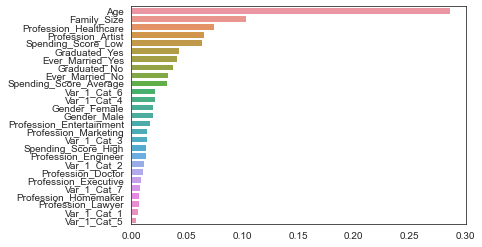

In [50]:
values = sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), names), 
             reverse=True)

sns.barplot([i[0] for i in values] , [i[1] for i in values])

Var_1_Cat doesnt seem to be very informative to be sure we are gonna use statistical tool known as chi square independency test to see which categorical variables are dependent to the target variabel 

In [51]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def chi_test(x , y , prob):
    table1 = np.asarray(pd.crosstab(x , y))
    stat , p , dof , expected = chi2_contingency(table1)
#     print('dof=%d'%dof)

#     print(expected)
    #interpretation of the test
#     prob = 0.95
    critical = chi2.ppf(prob , dof)

    if critical <= stat : 
        result = 'the variables are dependent'
    else: 
        result='the variables are independent'
    return result


In [52]:
for i in categorical:
    print(f"{i} , target : {chi_test(df[i] , df['Segmentation'] , 0.95)}" )

Gender , target : the variables are dependent
Ever_Married , target : the variables are dependent
Graduated , target : the variables are dependent
Profession , target : the variables are dependent
Spending_Score , target : the variables are dependent
Var_1 , target : the variables are dependent


All the categorical variables seems to be dependent but the var_1 doesnt seem to give more information about the target variable than others

## Recursive feature elimination

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KeyboardInterrupt: 

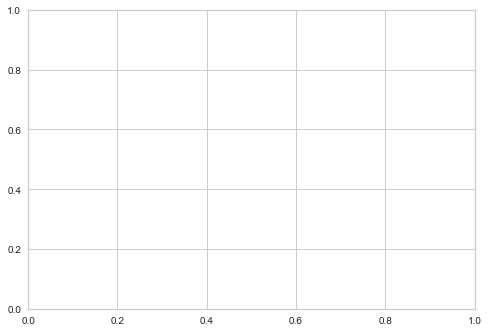

In [55]:
from yellowbrick.model_selection import RFECV
rfecv = RFECV(model , cv = 3)
rfecv.fit(x , y)
rfecv.show()

# Feature Encoding 

In [ ]:
def data_prep():
	X = pd.read_csv('data/Train_set.csv')
	X.drop('ID' , axis = 1 , inplace = True)
	numerical = []
	categorical = []

	for i in X.columns : 
	
		if X[i].dtype == np.object and i != 'Segmentation' :
			categorical.append(i)
		elif i != 'Segmentation' : 
			numerical.append(i)
	
	X.drop('Work_Experience' , axis = 1 , inplace = True)
	y = X['Segmentation']

	x = X[[i for i in X.columns if i != 'Segmentation']]

	return x , y  , numerical , categorical 
    

In [57]:
from sklearn.base import TransformerMixin
class ColumnTransformer (TransformerMixin):
    def __init__(self , features):
        self.features = features
        
    def fit(self , X , y = None):
        return self
    def transform(self , X , y = None ):
        X_ = X.copy()
        return X_[self.features]

In [ ]:
class Impute_MV(TransformerMixin):
    def __init__(self):
        pass
    def fit(self , X , y = None ):
        return self
    def transform(self , X , y = None):
        X_ = X.copy()
        for i in X_.columns : 
            if X_[i].isna().sum() and  X_[i].dtype == 'O':
                X_[i] = X_[[i]].apply(lambda x:x.fillna(x.value_counts().index[0]))
            elif X_[i].isna().sum(): 
                X_[i] = X_[[i]].fillna(X_[i].mean())
        return X_

In [ ]:
class One_Hot(TransformerMixin):
    def __init__(self):
        pass
    def fit(self , X , y=None):
        return self 
    def transform(self , X , y=None):
        X_ = X.copy()
        categorical = X_.columns
        for col in categorical:
            dummies = pd.get_dummies(X_[col], drop_first=False)
            dummies = dummies.add_prefix('{}_'.format(col))
            X_.drop(col, axis=1, inplace=True)
            X_ = X_.join(dummies)
        return X_